## Getting Data Using Pandas Datareader

In [0]:
!pip install pandas_datareader

In [0]:
import pandas_datareader
from pandas_datareader import data

import matplotlib.pyplot as plot
import pandas as pd

In [0]:
# Only get the adjusted close.
nifty = data.DataReader("^NSEI", 
                       start='2015-1-1', 
                       end='2020-4-15', 
                       data_source='yahoo')['Adj Close']

nf = pd.DataFrame(nifty)
# nf.info()
nf.to_csv('nifty.csv')

In [0]:
# Read in saved data, this will be in pandas dataframe format
nifty = pd.read_csv('nifty.csv')
nifty.head()

,Date,Adj Close
0,2015-01-02,8395.450195
1,2015-01-05,8378.400391
2,2015-01-06,8127.350098
3,2015-01-07,8102.100098
4,2015-01-08,8234.599609


In [0]:
# Set datetime
from datetime import datetime

netflix['Date'] = pd.to_datetime(netflix['Date'])

In [0]:
# Set index
nifty.set_index('Date', inplace = True)
nifty.head()

,Adj Close
Date,
2015-01-02,8395.450195
2015-01-05,8378.400391
2015-01-06,8127.350098
2015-01-07,8102.100098
2015-01-08,8234.599609


In [0]:
# Take a look at various fonts, lines, styles
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


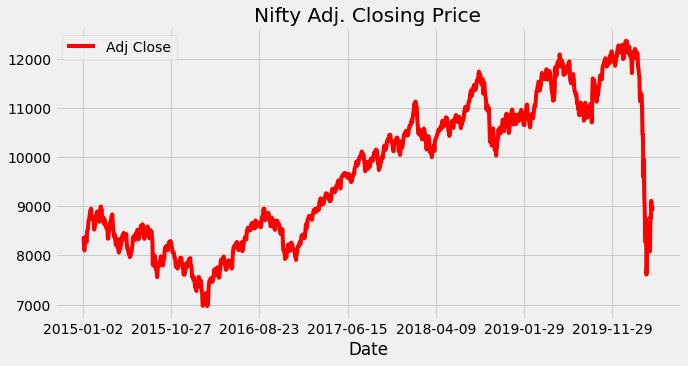

In [0]:
plot.style.use('fivethirtyeight')
nifty.plot(title='Nifty Adj. Closing Price', figsize=(10,5), color='red')
plot.show()

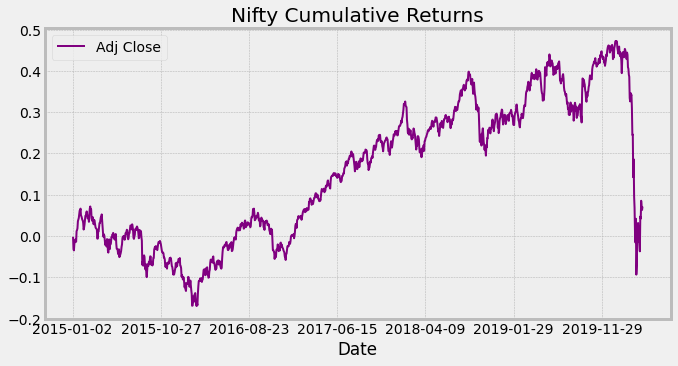

In [0]:
# Convert the adjusted closing prices to cumulative returns.

# Take percentage change of stock price of Netflix
returns = nifty.pct_change()

# Calculate the cumulative product
#  In cumulative product, the length of returned series is same as input series and every element is equal 
# to the product of current and all previous values.

plot.style.use('bmh')
((1 + returns).cumprod() - 1).plot(title='Nifty Cumulative Returns', figsize=(10,5), color='purple')

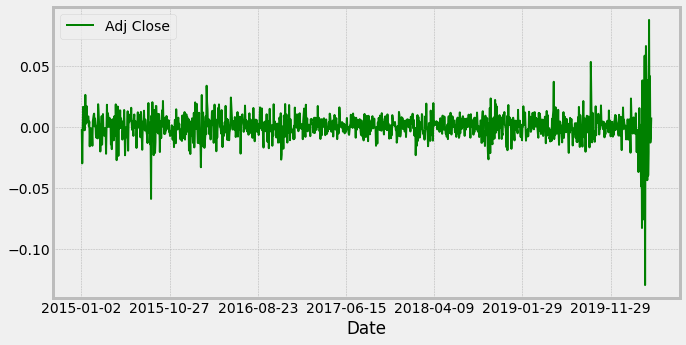

In [0]:
# Plot the returns, which is the percentage change in adjusted closing price

plot.style.use('tableau-colorblind10')
nifty.pct_change().plot(figsize=(10,5), color = 'green');

## Getting Data Using API Key 

In [0]:
# source:  https://github.com/RomelTorres/alpha_vantage
# source:  https://alpha-vantage.readthedocs.io/en/latest/
# You will need to obtain a free API key from Alpha Vantage

!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.3-cp36-none-any.whl size=14870 sha256=e0b4f01b5b7eb06f116fbca53ab95bb49c0bd4d5b6e016400acc0f4c0e5eaacb
  Stored in directory: /root/.cache/pip/wheels/d4/75/c2/483b0a988fd965b1128c1396a0ffadfb8903bd2bb569220048
Successfully built alpha-vantage


In [0]:
# Pull intraday data, example using Disney stock
from alpha_vantage.timeseries import TimeSeries

# ts = TimeSeries(key='YOUR_API_KEY_HERE')
ts = TimeSeries(key='HFWBAPPJ4B2C968U')

# Get json object with the intraday data and another with  the call's metadata

data, meta_data = ts.get_intraday('^NSEI')

In [0]:
# Take a look at data structure
data

{'2020-04-09 00:30:00': {'1. open': '9006.0996',
  '2. high': '9028.4004',
  '3. low': '8945.2998',
  '4. close': '8972.0996',
  '5. volume': '0'},
 '2020-04-09 00:45:00': {'1. open': '8970.9502',
  '2. high': '9013.8496',
  '3. low': '8970.9502',
  '4. close': '8998.7500',
  '5. volume': '0'},
 '2020-04-09 01:00:00': {'1. open': '8997.1700',
  '2. high': '9029.0600',
  '3. low': '8988.8900',
  '4. close': '9024.0200',
  '5. volume': '0'},
 '2020-04-09 01:15:00': {'1. open': '9023.0498',
  '2. high': '9024.5996',
  '3. low': '8987.3496',
  '4. close': '8995.8496',
  '5. volume': '0'},
 '2020-04-09 01:30:00': {'1. open': '8996.2500',
  '2. high': '8996.4502',
  '3. low': '8910.7002',
  '4. close': '8933.5498',
  '5. volume': '0'},
 '2020-04-09 01:45:00': {'1. open': '8935.0498',
  '2. high': '8961.2998',
  '3. low': '8904.7500',
  '4. close': '8948.2002',
  '5. volume': '0'},
 '2020-04-09 02:00:00': {'1. open': '8949.1200',
  '2. high': '8970.4100',
  '3. low': '8929.8400',
  '4. close'

In [0]:
# Reformat data
# The data frame structure is given by the call on alpha vantage rest API. 
# The column names of the data frames are the ones given by their data structure.

from alpha_vantage.timeseries import TimeSeries
from pprint import pprint

# ts = TimeSeries(key='YOUR_API_KEY_HERE', output_format='pandas')
ts = TimeSeries(key='HFWBAPPJ4B2C968U', output_format='pandas')

# Use 'DIS' for Disney
data, meta_data = ts.get_intraday(symbol='^NSEI',interval='1min', outputsize='full')
pprint(data.head(10))

                       1. open    2. high     3. low   4. close  5. volume
date                                                                      
2020-04-17 04:20:00  9144.5498  9146.4502  9137.5996  9138.0996        0.0
2020-04-17 04:19:00  9139.2500  9144.4502  9137.0000  9144.4502        0.0
2020-04-17 04:18:00  9129.0996  9139.5000  9127.1504  9138.4502        0.0
2020-04-17 04:17:00  9124.1504  9130.8496  9123.0498  9129.7500        0.0
2020-04-17 04:16:00  9128.3496  9128.7500  9120.5996  9124.7002        0.0
2020-04-17 04:15:00  9131.5000  9131.6504  9123.5996  9128.4502        0.0
2020-04-17 04:14:00  9136.1504  9139.9004  9131.0498  9132.1504        0.0
2020-04-17 04:13:00  9133.4502  9136.5996  9131.2998  9136.3496        0.0
2020-04-17 04:12:00  9139.2998  9141.5498  9134.2998  9134.2998        0.0
2020-04-17 04:11:00  9135.0000  9146.2500  9135.0000  9139.2002        0.0


In [0]:
# We can also plot crypto currencies prices like Bitcoin

from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key='HFWBAPPJ4B2C968U', output_format='pandas')

data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

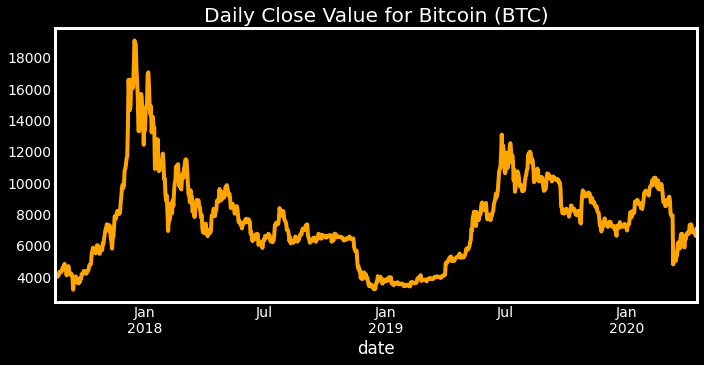

In [0]:
# Plot the data

plot.style.use('dark_background')
data['4b. close (USD)'].plot(figsize=(10,5), linewidth=4, color='orange')
plot.tight_layout()
plot.title('Daily Close Value for Bitcoin (BTC)')
plot.grid()
plot.show()

In [0]:
# end 